### Problem Statement : mengetahui persebaran dan rataan tabungan di bank
1. Dimana saja persebaran pemilik account bank? 
2. Berapa rata-rata umur pemilik credit card berdasarkan kategorinya? 
3. Berapa jumlah produk yang dimiliki nasabah berdasarkan gender dan kategori umurnya?
4. Berapa rata-rata saldo pemilik account bank berdasarkan wilayah nya? 
5. Kota mana dengan % salary terbanyak dilihat dari asal pemilik account bank? 



Link visualisasi tableu : https://public.tableau.com/views/Milestone1_16668792433280/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Sumber dataset dari kaggle : https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import library yang dibutuhkan

In [317]:
df = pd.read_csv("bank_cust_abc.csv")

membaca dataframe dari local

In [318]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Melihat data frame

In [319]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

melihat apakah ada missing value dalam dataset kita

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Karena dalam dataset sudah tidak ada missing value maka kita sudah bisa langsung melakukan analisis terhadap dataset

In [321]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [322]:
df['balance'].mean()

76485.88928799961

Melihat rata-rata balance dari akun bank yang dimiliki nasabah

In [323]:
df['balance'].median()

97198.54000000001

Melihat median balance dari akun bank yang dimiliki nasabah

In [324]:
df['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

In [325]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [326]:
df.loc[:,'balance'].skew()

-0.14110871094154384

Cek nilai skewness dari column 'balance'

In [327]:
df['balance'].var()

3893436175.9907765

Cek nilai variable dari column 'balance'

In [328]:
df.balance.std()

62397.40520238623

Cek nilai standar deviasi dari column 'balance'

In [329]:
upper_limit = df.balance.mean() + 3*df.balance.std()
upper_limit

263678.1048951583

In [330]:
lower_limit = df.balance.mean() + -3*df.balance.std()
lower_limit

-110706.32631915908

Menentukan lower limit dan upper limit dari balance

In [331]:
df[(df.balance>upper_limit) | (df.balance<lower_limit)]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


Cleaning data menggunakan standar 3 deviasa dikarenakan nilai skew yang masih normal. Dari data yang sudah di dapat bisa dilihat kalau tidak ada data yang berada diluar outliers.

In [343]:
contingency_table = pd.crosstab(df['gender'],df['credit_card'])
contingency_table

credit_card,0,1
gender,,
Female,1351,3192
Male,1594,3863


In [344]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.579
Probably independent


Melakukan statistik inferential menggunakan chi-square untuk melihat kecenderungan memiliki credit card. dari hasil test dapat kita ketahui bahwa memiliki credit cards tidak ada kecenderungan pada jenis kelamin, tetapi pribadi masing-masing yang ingin memiliki nya

In [76]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

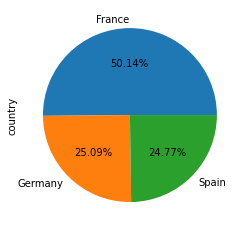

In [113]:
df['country'].value_counts().plot(kind='pie', autopct='%.2f%%')

dari data yang kita peroleh menunjukan bahwa 50.14% nasabah berasal dari France, 25.09% berasal dari Germany, dan 24.77% berasal dari Spain

In [347]:
df.loc[df['credit_card'] == 1,['age','estimated_salary']].agg(['mean'])

,age,estimated_salary
mean,38.842381,99721.161949


Rata-rata umur dan rata-rata perkiraan pendapatan perbulan untuk orang yang mempunyai credit card

<AxesSubplot:>

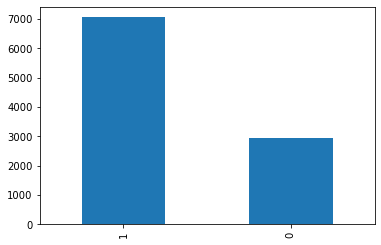

In [112]:
df['credit_card'].value_counts().plot(kind='bar')

sebanyak 7000 nasabah mempunyai credit card.
dengan keterangan 1 menunjukan mempunyai credit card dan 0 tidak mempunyai credit card

In [250]:
gol_umur = [17, 31, 41, 61, 92]
kategori = ['Remaja', 'Dewasa', 'Orang Tua', 'Lansia']
golongan = pd.cut(df['age'], bins = gol_umur, labels = kategori)
golongan.value_counts()



Dewasa       4413
Orang Tua    2804
Remaja       2372
Lansia        411
Name: age, dtype: int64

Membuat variable baru 'golongan' untuk memfilter umur berdasarkan kategori nya

In [132]:
having_creditcard = df['credit_card'] == 1

having_creditcard.value_counts()

True     7055
False    2945
Name: credit_card, dtype: int64

In [205]:
a=df.groupby('country').count()[['estimated_salary']]

<AxesSubplot:ylabel='country'>

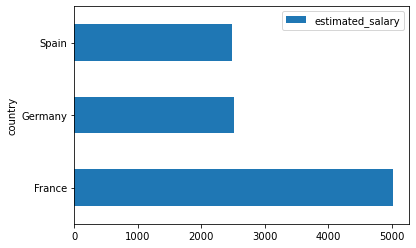

In [206]:
a.plot(kind='barh')

Dari barchart diatas kita bisa melihat bahwa jumlah salary terbanyak berasal dari nasabah yang berada di france

<AxesSubplot:xlabel='age'>

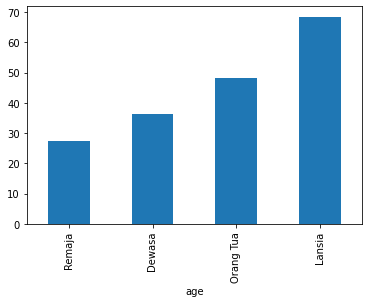

In [293]:
df[
    (df['credit_card'] == 1)
].groupby(golongan)['age'].mean().plot(kind='bar')



Dari barchart diatas kita bisa melihat bahwa rata-rata kategori yang mempunyai credit card adalah lansia, dengan rata-rata 70 orang yang mempunyai credit card

<AxesSubplot:xlabel='country'>

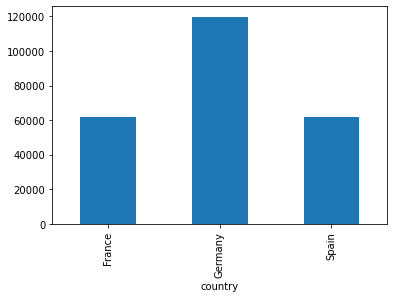

In [288]:
df.groupby(['country'])['balance'].mean().plot(kind='bar')

rata-rata balance di akun bank terbanyak berasal dari nasabah Germany

<AxesSubplot:xlabel='gender,age'>

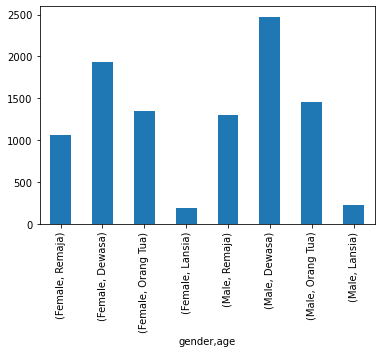

In [291]:
df.groupby(['gender', golongan])['products_number'].count().plot(kind='bar')

Dari barchart diatas kita bisa melihat bahwa kategori Laki-laki dewasa paling banyak mempunyai produk dari bank dengan jumlah 2500 produk